In [1]:
import flopy
from flopy import utils as fu
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import re
import os
import platform
if 'window' not in platform.platform().lower():
    newln = '\r\n'
else:
    newln = '\n'

In [2]:
if not os.path.exists('junk'):
    os.mkdir('junk')

In [3]:
inmod = flopy.modflow.Modflow.load('freyberg.nam')
inmod.model_ws = 'junk'
inmod.sr


changing model workspace...
   junk


xul:0; yul:10000; rotation:0; proj4_str:+init=EPSG:4326; units:meters; lenuni:2

In [4]:
Xall, Yall = inmod.sr.xcentergrid, inmod.sr.ycentergrid

In [5]:
# read in the observations
inobs = pd.read_csv('obsdata.dat', delim_whitespace=True)

In [6]:
inobs['row'] = [int(re.findall(r'\d+', i)[0]) for i in inobs.obsname]
inobs['col'] = [int(re.findall(r'\d+', i)[1]) for i in inobs.obsname]

In [7]:
inobs['x'] = [Xall[i,j] for i,j in zip(inobs.row,inobs.col)]
inobs['y'] = [Yall[i,j] for i,j in zip(inobs.row,inobs.col)]


In [8]:
inobs

,obsname,obsvalue,weight,group,row,col,x,y
0,cr03c16,22.18672,1.0,head_cal,3,16,4125.0,9125.0
1,cr03c10,24.08591,1.0,head_cal,3,10,2625.0,9125.0
2,cr04c9,22.33339,1.0,head_cal,4,9,2375.0,8875.0
3,cr10c2,31.83430,1.0,head_cal,10,2,625.0,7375.0
4,cr14c11,17.72841,1.0,head_cal,14,11,2875.0,6375.0
5,cr16c17,16.56648,1.0,head_cal,16,17,4375.0,5875.0
6,cr22c11,18.28594,1.0,head_cal,22,11,2875.0,4375.0
7,cr23c16,15.20820,1.0,head_cal,23,16,4125.0,4125.0
8,cr25c5,24.24294,1.0,head_cal,25,5,1375.0,3625.0
9,cr27c7,22.74890,1.0,head_cal,27,7,1875.0,3125.0


In [9]:
# set up HYDMOD in flopy
NHYD = len(inobs.loc[(inobs.group == 'head_fore') | (inobs.group == 'head_cal')])
IHYDUN = 42
HYDNOH = -9999999
PCKG = 'BAS'
ARR = 'HD'
hydinfo = []
for crec in inobs.loc[(inobs.group == 'head_fore') | (inobs.group == 'head_cal')].iterrows():
    INTYP = 'I'
    cobsname = crec[1].obsname
    hydinfo.append([PCKG, ARR, INTYP, 1, crec[1].x, crec[1].y, cobsname])
hyd = flopy.modflow.ModflowHyd(inmod, nhyd=NHYD, ihydun=IHYDUN, hydnoh=HYDNOH, obsdata=hydinfo)
inmod.write_input()

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfhyd.ModflowHyd'> <class 'flopy.modflow.mfhyd.ModflowHyd'>
replacing existing Package...


In [10]:
hydinfo

[['BAS', 'HD', 'I', 1, 4125.0, 9125.0, 'cr03c16'],
 ['BAS', 'HD', 'I', 1, 2625.0, 9125.0, 'cr03c10'],
 ['BAS', 'HD', 'I', 1, 2375.0, 8875.0, 'cr04c9'],
 ['BAS', 'HD', 'I', 1, 625.0, 7375.0, 'cr10c2'],
 ['BAS', 'HD', 'I', 1, 2875.0, 6375.0, 'cr14c11'],
 ['BAS', 'HD', 'I', 1, 4375.0, 5875.0, 'cr16c17'],
 ['BAS', 'HD', 'I', 1, 2875.0, 4375.0, 'cr22c11'],
 ['BAS', 'HD', 'I', 1, 4125.0, 4125.0, 'cr23c16'],
 ['BAS', 'HD', 'I', 1, 1375.0, 3625.0, 'cr25c5'],
 ['BAS', 'HD', 'I', 1, 1875.0, 3125.0, 'cr27c7'],
 ['BAS', 'HD', 'I', 1, 4125.0, 2375.0, 'cr30c16'],
 ['BAS', 'HD', 'I', 1, 2125.0, 1375.0, 'cr34c8'],
 ['BAS', 'HD', 'I', 1, 2875.0, 1125.0, 'cr35c11'],
 ['BAS', 'HD', 'I', 1, 4125.0, 9125.0, 'fr03c16'],
 ['BAS', 'HD', 'I', 1, 2625.0, 9125.0, 'fr03c10'],
 ['BAS', 'HD', 'I', 1, 2375.0, 8875.0, 'fr04c9'],
 ['BAS', 'HD', 'I', 1, 625.0, 7375.0, 'fr10c2'],
 ['BAS', 'HD', 'I', 1, 2875.0, 6375.0, 'fr14c11'],
 ['BAS', 'HD', 'I', 1, 4375.0, 5875.0, 'fr16c17'],
 ['BAS', 'HD', 'I', 1, 2875.0, 4375.0, '

In [11]:
crec[1].obsname

'fr25c10'

In [12]:
# make an instruction file for heads
with open('freyberg.heads.ins', 'w') as ofp:
    ofp.write('pif ~{0}'.format(newln))
    for i,cob in enumerate(inobs.loc[inobs.group == 'head_cal'].obsname):
        if i ==0:
            ofp.write('l2  w !{0}!{1}'.format(cob,newln))
        else:
            ofp.write('l1  w !{0}!{1}'.format(cob,newln))
    for i,cob in enumerate(inobs.loc[inobs.group == 'head_fore'].obsname):
        ofp.write('l1  w !{0}!{1}'.format(cob,newln))
            

In [13]:
# make an instruction file for river flux
with open('freyberg.rivflux.ins', 'w') as ofp:
    ofp.write('pif ~{0}'.format(newln))
    ofp.write('l2  w !{0}!{1}'.format('rivflux_cal',newln))
    ofp.write('l1  w !{0}!{1}'.format('rivflux_fore',newln))

In [14]:
# make runmodel.py
with open('run_model.py', 'w') as ofp:
    ofp.write('import os{0}'.format(newln))
    ofp.write('os.system("mf2005 freyberg.nam"){0}'.format(newln))
    ofp.write('os.system("python Process_output.py"){0}'.format(newln))
    


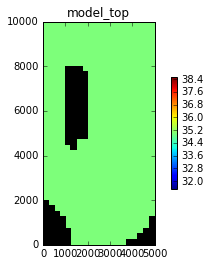

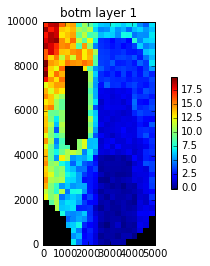

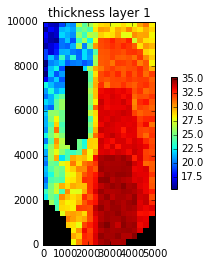

In [18]:
inmod.dis.plot()